# Исследовательский проект

## Введение

### Описание проблемы:

* **Проблема:** В последние годы рынок краткосрочной аренды жилья через платформы, такие как Airbnb, существенно вырос. Тем не менее, существует ограниченное понимание того, какие факторы наиболее сильно влияют на цены листингов. Это знание может помочь как владельцам жилья, так и арендаторам лучше ориентироваться на рынке

* **Актуальность:** Для владельцев жилья знание факторов, влияющих на цену, поможет оптимизировать свои предложения, а для арендаторов — выбрать наиболее выгодные варианты

* **Исследовательский вопрос:** Какие факторы объясняют вариации цен на листинги Airbnb в Амстердаме в будние дни?

### Гипотезы

1. Листинги, расположенные ближе к центру города, имеют более высокие цены
2. Листинги, предоставляемые суперхостами, имеют более высокие цены
3. Листинги с большим количеством спален имеют более высокие цены
4. Листинги с высоким рейтингом удовлетворенности гостей имеют более высокие цены
5. Листинги, предлагающие целый дом или квартиру, имеют более высокие цены по сравнению с отдельными комнатами
6. Листинги, расположенные ближе к популярным туристическим местам, имеют более высокие цены
7. Листинги, находящиеся в районах с высоким уровнем бизнеса (biz), имеют более высокие цены
8. Листинги с более высоким значением cleanliness_rating имеют более высокую цену
9. Листинги, доступные для бронирования на несколько комнат (multi), имеют более высокие цены


## Анализ

### Методология:

* #### Методы сбора данных:
 Данные собраны и предоставлены в виде CSV-файла. Источник данных - платформа Airbnb


* ####  Описание данных
  Данные содержат информацию о краткосрочной аренде жилья в Амстердаме в будние дни. Каждый объект недвижимости представлен множеством характеристик, включая тип комнаты, вместимость, оценки чистоты и удовлетворенности гостей, а также различные индексы привлекательности и доступности ресторанов. Данные могут использоваться для анализа факторов, влияющих на цены и популярность аренды, а также для оценки качества обслуживания

  Файл: [amsterdam_weekends.csv](https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities?select=amsterdam_weekdays.csv)

* #### Столбцы данных:

  1. **Unnamed: 0**: Идентификатор записи (тип: числовой)
  2. **realSum**: Реальная сумма, стоимость проживания (тип: числовой)
  3. **room_type**: Тип комнаты (категориальный)
  4. **room_shared**: Комната общая (бинарный)
  5. **room_private**: Комната частная (бинарный)
  6. **person_capacity**: Вместимость комнаты (тип: числовой)
  7. **host_is_superhost**: Хост является супер-хостом (бинарный)
  8. **multi**: Количество объектов (тип: числовой)
  9. **biz**: Бизнес-категория (тип: числовой)
  10. **cleanliness_rating**: Оценка чистоты (тип: числовой)
  11. **guest_satisfaction_overall**: Общая удовлетворенность гостей (тип: числовой)
  12. **bedrooms**: Количество спален (тип: числовой)
  13. **dist**: Расстояние до центра (тип: числовой)
  14. **metro_dist**: Расстояние до метро (тип: числовой)
  15. **attr_index**: Индекс привлекательности (тип: числовой)
  16. **attr_index_norm**: Нормированный индекс близости к туристическим местам (тип: числовой)
  17. **rest_index**: Индекс ресторанов (тип: числовой)
  18. **rest_index_norm**: Нормированный индекс ресторанов (тип: числовой)
  19. **lng**: Долгота (тип: числовой)
  20. **lat**: Широта (тип: числовой)

* #### Аналитические методы:

  1. Визуализация данных: Использование гистограмм, scatter plot, box plot и heatmap для анализа распределения данных и зависимостей между переменными

  2. Описательная статистика: Средние значения, медианы, стандартные отклонения и другие описательные статистики для ключевых переменных

  3. Корреляционный анализ: Определение корреляций между переменными с помощью коэффициента корреляции Пирсона

  4. T-тест: Сравнение средних значений между двумя группами.

#### Импорт библиотек

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
%matplotlib inline

#### Считываем данные и предобрабатываем

In [2]:
file_path = 'amsterdam_weekdays.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


In [3]:
# Удаляем ненужную индексацию, потому что в pandas есть встроенная
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


In [4]:
# Проверка на пропуски
df.isnull().sum()

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
dtype: int64

Пропусков нет, приступим к проверке гипотез, начнем с корреляционного анализа и описательной статистики, построим тепловую карту корреляций




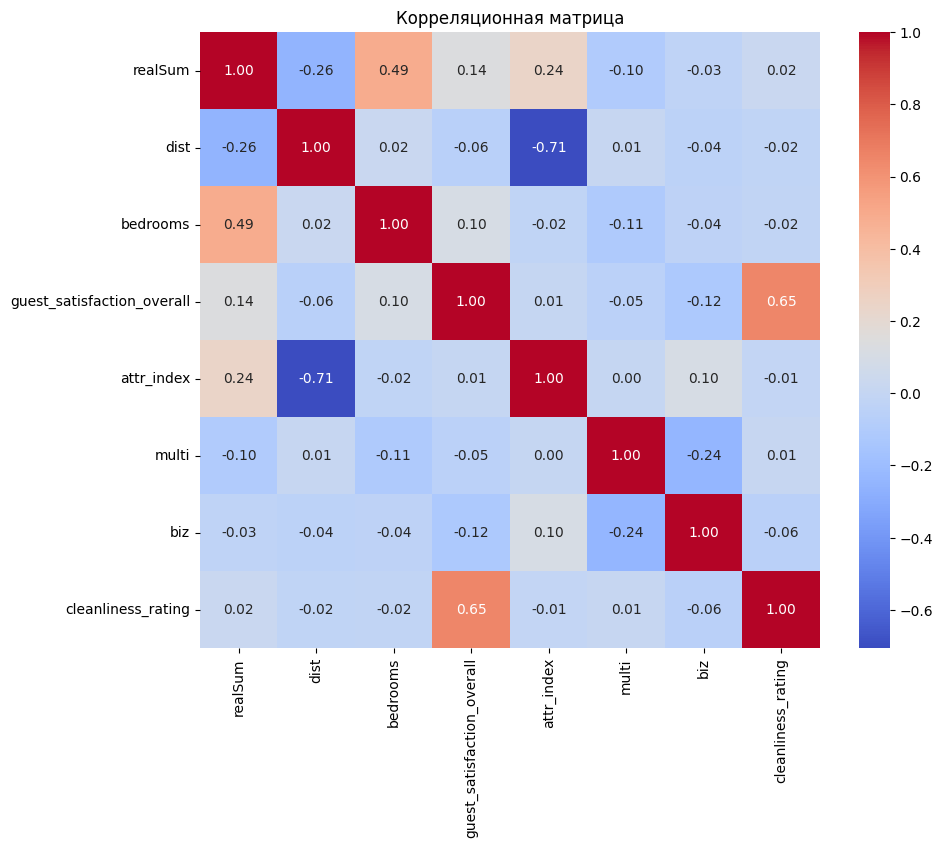

In [22]:
correlation_matrix = df[['realSum', 'dist', 'bedrooms', 'guest_satisfaction_overall', 'attr_index', 'multi', 'biz', 'cleanliness_rating']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

Описательная статистика

In [11]:
df[['realSum', 'dist', 'host_is_superhost', 'bedrooms', 'guest_satisfaction_overall',
                 'attr_index', 'multi', 'biz']].describe()

,realSum,dist,bedrooms,guest_satisfaction_overall,attr_index,multi,biz
count,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.00000,1103.000000
mean,545.020526,2.841621,1.282865,94.362647,271.009899,0.30825,0.115141
std,416.974314,2.123245,0.740178,6.089691,197.046890,0.46198,0.319336
min,128.887118,0.015059,0.000000,20.000000,40.931415,0.00000,0.000000
25%,309.797764,1.302058,1.000000,92.000000,127.909866,0.00000,0.000000
50%,430.248635,2.341366,1.000000,96.000000,208.180311,0.00000,0.000000
75%,657.324303,3.648138,2.000000,98.000000,386.442241,1.00000,0.000000
max,7782.907225,11.187100,5.000000,100.000000,1888.550428,1.00000,1.000000


Теперь построим графики для наших гипотез, чтобы подкрепить наши выводы из кореляционного анализа и описательной статистики

**Листинги, расположенные ближе к центру города, имеют более высокие цены**

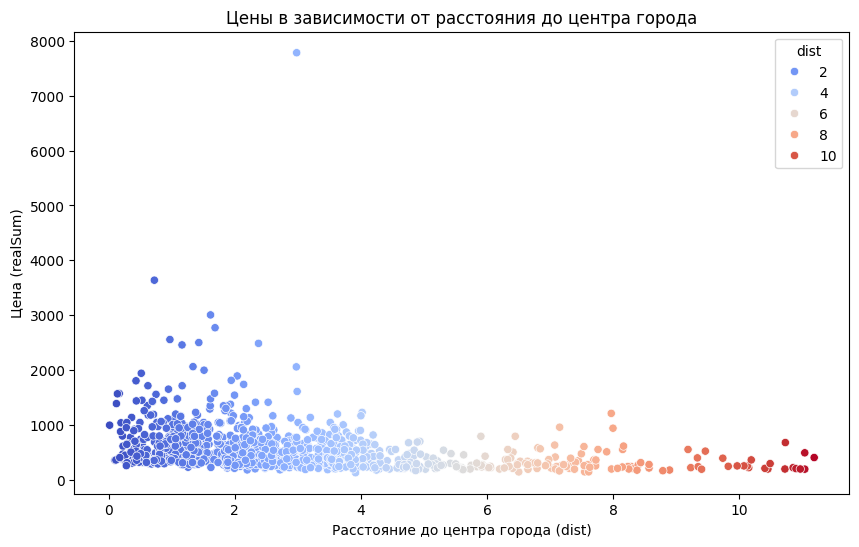

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='dist', y='realSum', hue='dist', palette='coolwarm')
plt.title('Цены в зависимости от расстояния до центра города')
plt.xlabel('Расстояние до центра города (dist)')
plt.ylabel('Цена (realSum)')
plt.show()

**Вывод:**
Значение корреляции между переменными -0.26, что говорит об небольшой обратной связи - чем меньше расстояние до центра, тем выше цена, это и подтверждается по графику, потому что видим сильное скопление точек на высоких значениях цен у малого значения dist и наоборот малое значение цены у точек с максимальной dist

*Гипотеза подтверждается*

**Листинги, предоставляемые суперхостами, имеют более высокие цены**

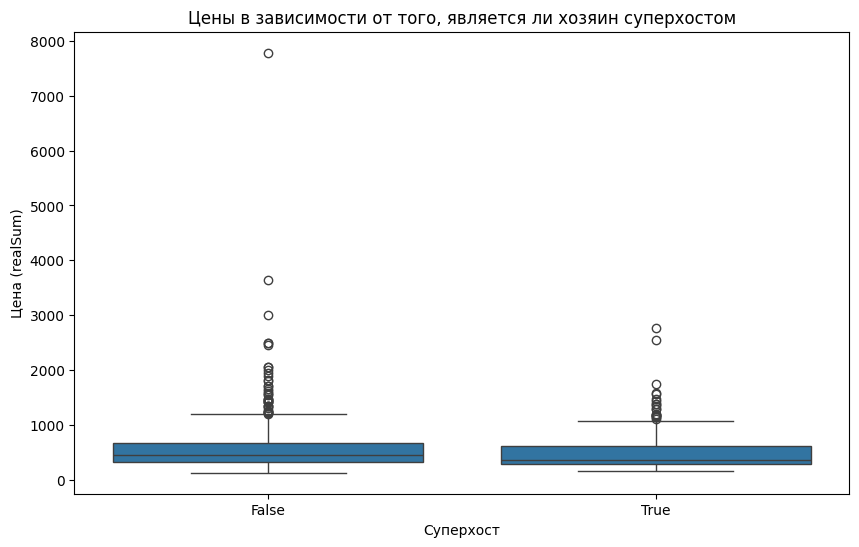

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='host_is_superhost', y='realSum')
plt.title('Цены в зависимости от того, является ли хозяин суперхостом')
plt.xlabel('Суперхост')
plt.ylabel('Цена (realSum)')
plt.show()

In [12]:
# t-test
superhost_prices = df[df['host_is_superhost'] == True]['realSum']
non_superhost_prices = df[df['host_is_superhost'] == False]['realSum']
t_stat_superhost, p_val_superhost = ttest_ind(superhost_prices, non_superhost_prices)
t_stat_superhost, p_val_superhost

(-2.0985191376128354, 0.03608667618036517)

**Вывод:** Построили диарамму с усами и видим, что медианное значение ниже у True, но слабо заметно на графике, поэтому мы дополнительно сделали t-test и увидели значимую разницу в ценах причем цена у True Ниже

*Гипотеза отвергается*

**Листинги с большим количеством спален имеют более высокие цены**

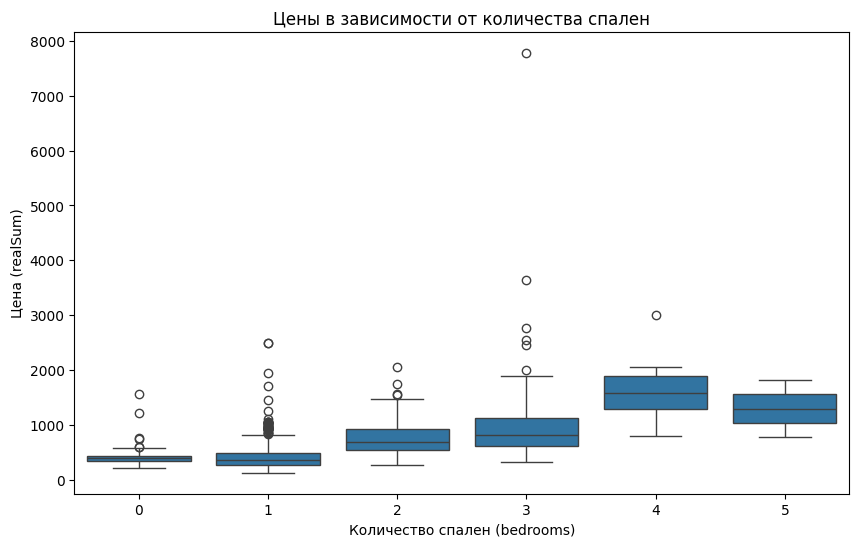

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='bedrooms', y='realSum')
plt.title('Цены в зависимости от количества спален')
plt.xlabel('Количество спален (bedrooms)')
plt.ylabel('Цена (realSum)')
plt.show()

**Вывод:** Построили диарамму с усами и видим, что медианное значение растет до 4 спален, но потом становится ниже, но это некритично, также наличие корреляции между переменными 0.49, что говорит о наличии положительной связи между переменными

*Гипотеза принимается*

**Листинги с высоким рейтингом удовлетворенности гостей имеют более высокие цены**

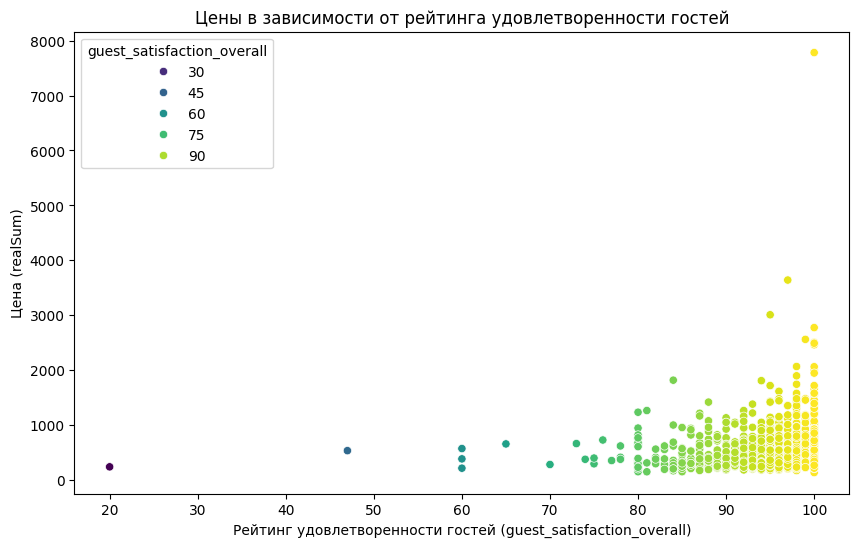

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='guest_satisfaction_overall', y='realSum', hue='guest_satisfaction_overall', palette='viridis')
plt.title('Цены в зависимости от рейтинга удовлетворенности гостей')
plt.xlabel('Рейтинг удовлетворенности гостей (guest_satisfaction_overall)')
plt.ylabel('Цена (realSum)')
plt.show()

**Вывод:** По точечной диаграмме мы видим положительный тренд и можем сказать, что рейтинг удовлетворенности гостей влияет на цену. Корреляция между переменными 0.14, что говорит о наличии малой положительной линейной зависимости

*Гипотеза принимается*

**Листинги, предлагающие целый дом или квартиру, имеют более высокие цены по сравнению с отдельными комнатами**

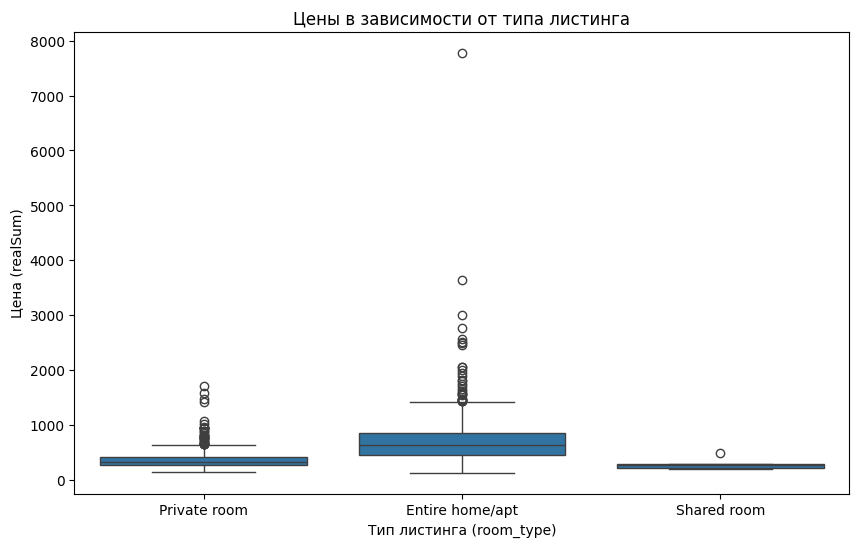

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='room_type', y='realSum')
plt.title('Цены в зависимости от типа листинга')
plt.xlabel('Тип листинга (room_type)')
plt.ylabel('Цена (realSum)')
plt.show()

In [17]:
# t-test
entire_home_prices = df[df['room_type'] == 'Shared room']['realSum']
private_room_prices = df[df['room_type'] == 'Private room']['realSum']
t_stat_room_type, p_val_room_type = ttest_ind(entire_home_prices, private_room_prices)
t_stat_room_type, p_val_room_type

(-1.1628609255034663, 0.24537858346227584)

**Вывод:** По диаграмме с усами мы видим, что дом дороже квартиры и отдельных комнат, но проведенный t-test показывает, что нет статистической разницы между квартиры и отдельной комнаты, поэтому можем принять гипотезу частично и сказать, что дом - самый дорой тип листинга

*Гипотеза принимается частично*

**Листинги, расположенные ближе к популярным туристическим местам, имеют более высокие цены**

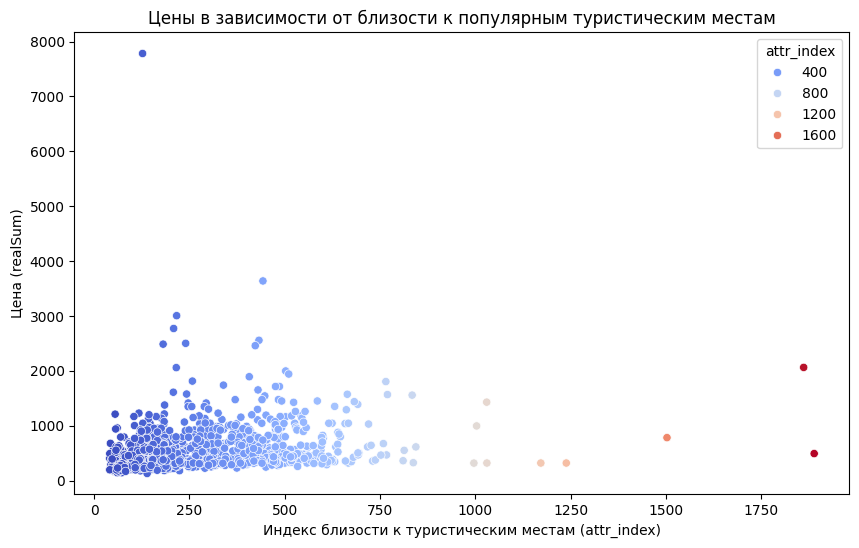

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='attr_index', y='realSum', hue='attr_index', palette='coolwarm')
plt.title('Цены в зависимости от близости к популярным туристическим местам')
plt.xlabel('Индекс близости к туристическим местам (attr_index)')
plt.ylabel('Цена (realSum)')
plt.show()

**Вывод:** По диаграмме видим, что все точки сконцентрированны в основном у маленьких значений индекса, также имеется положительная корелляция 0.24, что говорит  наличии положительный связи

Рациональнее будет учесть, что чем меньше индекс близости тем больше цена, но если рассматривать большинство значений, котоый сконцентрированны от 0 до 750, то будем наблюдать положительный тренд(изходя из корреляционного анализа) и цена не будет зависеть от индекса

*Гипотеза принимается частично*

**Листинги, находящиеся в районах с высоким уровнем бизнеса (biz), имеют более высокие цены**

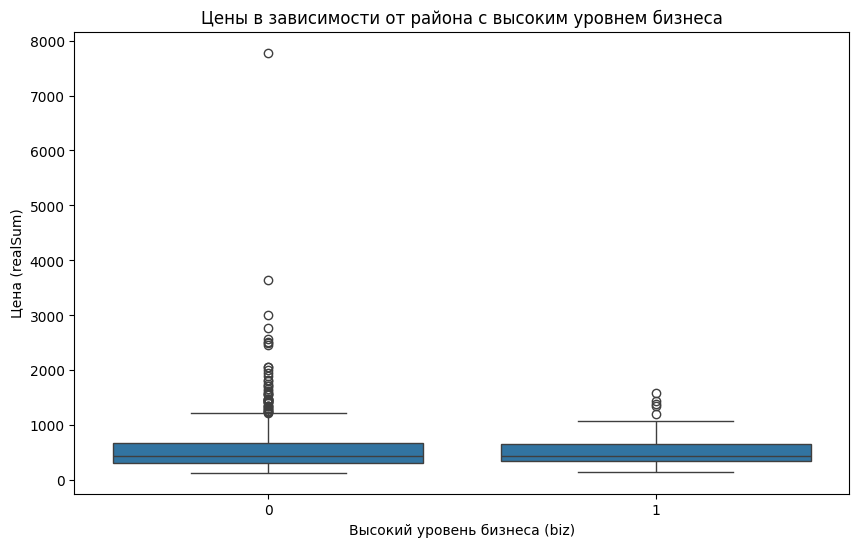

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='biz', y='realSum')
plt.title('Цены в зависимости от района с высоким уровнем бизнеса')
plt.xlabel('Высокий уровень бизнеса (biz)')
plt.ylabel('Цена (realSum)')
plt.show()

In [21]:
# t-test
biz_1 = df[df['biz'] == 0]['realSum']
biz_0 = df[df['biz'] == 1]['realSum']
t_stat_room_type, p_val_room_type = ttest_ind(biz_1, biz_0)
t_stat_room_type, p_val_room_type

(0.889840772053003, 0.37374577740623316)

**Вывод:** По диаграмме с усами тяжело что-то сказать, но мы проводим т-тест, который показывает p-value 0.37, что говорит о том, что нет статистической разницы между переменными

*Гипотеза отвергается*

**Листинги с более высоким значением cleanliness_rating имеют более высокую цену**

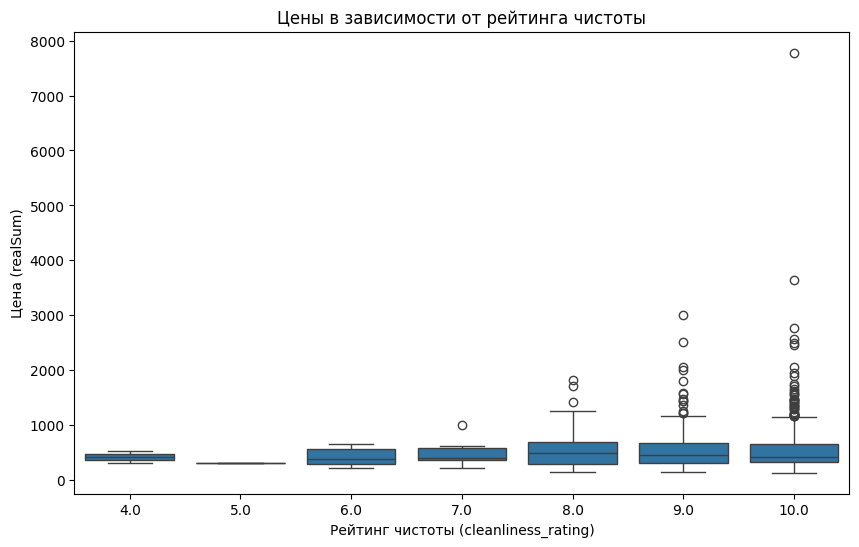

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cleanliness_rating', y='realSum')
plt.title('Цены в зависимости от рейтинга чистоты')
plt.xlabel('Рейтинг чистоты (cleanliness_rating)')
plt.ylabel('Цена (realSum)')
plt.show()

In [25]:
# t-test
median_cleanliness = df['cleanliness_rating'].median()
low_cleanliness_prices = df[df['cleanliness_rating'] < median_cleanliness]['realSum']
high_cleanliness_prices = df[df['cleanliness_rating'] >= median_cleanliness]['realSum']
t_stat_cleanliness, p_val_cleanliness = ttest_ind(low_cleanliness_prices, high_cleanliness_prices)
t_stat_cleanliness, p_val_cleanliness

(-0.2639312898795241, 0.7918822557617405)

**Вывод:** По диаграмме с усами видим, что значения примерно одинаковые, корреляция близка к 0, проведенный t-test показывает значение 0.8, что говорит нам об отстутствии статистической разницы средних

*Гипотеза отвергается*

**Листинги, доступные для бронирования на несколько комнат (multi), имеют более высокие цен**

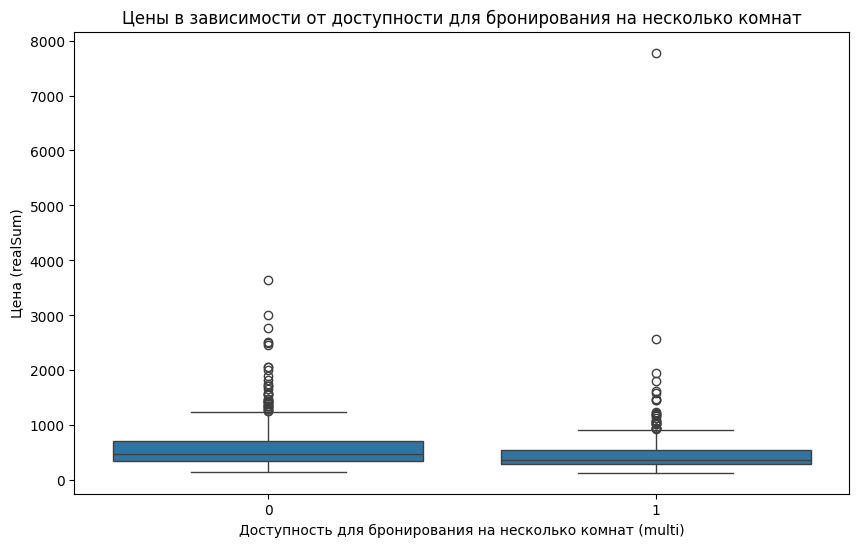

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='multi', y='realSum')
plt.title('Цены в зависимости от доступности для бронирования на несколько комнат')
plt.xlabel('Доступность для бронирования на несколько комнат (multi)')
plt.ylabel('Цена (realSum)')
plt.show()

In [28]:
# t-test
mult_1 = df[df['multi'] == 0]['realSum']
mult_0 = df[df['multi'] == 1]['realSum']
t_stat_mult, p_val_mult = ttest_ind(mult_1, mult_0)
t_stat_mult, p_val_mult

(3.502504162873662, 0.0004793932043132782)

**Вывод:** По диаграмме с усами видим, что значения примерно одинаковые, но цена для листингов, где значение одна комната немного больше,проведенный t-test показывает значение 0.0004, что говорит нам о наличии статистической разницы средних

*Гипотеза подтверждается*

## Общий вывод по проверенным гипотезам

* #### На цену листинга в основном влияют следующие факторы:

  1. Близость к центру города: Чем ближе листинг к центру, тем выше цена

  2. Количество спален: Листинги с большим количеством спален имеют более высокие цены

  3. Тип жилья: Целые дома или квартиры стоят дороже, чем отдельные комнаты

  4. Доступность для бронирования на несколько комнат: Листинги, доступные для бронирования на несколько комнат, имеют более высокие цены

  5. Рейтинг удовлетворенности гостей: чем больше рейтинг, тем дороже листинг